# Лабораторийн ажил №2

`Пайтон сантай ажиллах ба зургийн боловсруулалт`

<font color="green">Тус лабораторийн ажлаар зургийн боловсруулалтын процесс ойлгох, Python сангууд болох PIL,
Matplotlib, NumPy сангууд ба тэдгээрийг хэрхэн хэрэгжүүлэх талаар судлах, туршилтыг гүйцэтгэнэ.</font>

## 1.1 PIL – the Python ImagingLibrary

зургийг resizing, cropping, rotating, color conversion гэх мэт зурагт
хамгийн өргөн хэрэглэгддэг үйлдлүүдийг боловсруулах функцын сан 

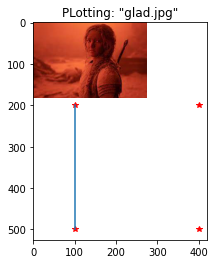

In [ ]:
from PIL import Image
from pylab import *

# read image to array
im = array(Image.open('download.jpeg'))

# plot the image
imshow(im)

# some points
x = [100, 100, 400, 400]
y = [200, 500, 200, 500]

# plot the point with red star-merkers
plot(x,y, "r*")

# line plot connectiong the first two points
plot(x[:2], y[:2])

# add title and show the plot
title('PLotting: "glad.jpg"')
show()

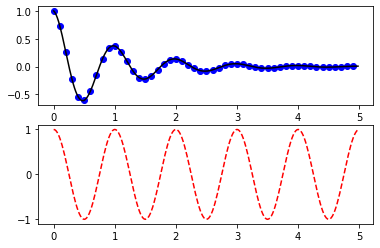

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
  return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

## JPG өргтгөлтэй 100 зургийг png өргөтгөлтэй хэмжээг нь багсаж нормалчилав.

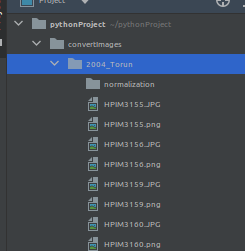

In [ ]:
# Convert jpg files to png
import os
import glob
from PIL import Image

size = (128, 128)

images = glob.glob("/home/jakitcs/pythonProject/convertImages/2004_Torun/*.JPG")

for image in images:
    outfile = os.path.splitext(image)[0] + ".png"
    print(outfile)
    with open(image, 'rb') as file:
        img = Image.open(file)
        img.thumbnail(size)
        img.save(outfile)

# PIL -сангын функцуудыг судалж туршиж үзэв.

In [ ]:
from PIL import Image
from PIL import ImageFilter
from PIL import ImageEnhance
from urllib.request import urlopen
import os

# zurgaa unshih
im1 = Image.open('download.jpeg')
im2 = Image.open("download1.jpeg")

# 1. Image object iig haruulah
print("Image 1 object", im1.format, im1.size, im1.mode)
print("Image 2 object", im2.format, im2.size, im2.mode, im2.format_description)


# 2. Color conversion ongoruu huwirgah
grayScale = im1.convert('L')
blackAndWhiteImage = im2.convert('1')
grayScale.show()
blackAndWhiteImage.show()

# 3. Copying subrectangle image
box = (30, 10, 200, 100) # (left, upper, right, lower)
region = im1.crop(box) # crop(self, box=None):
region.show()

# 4. Processing a subrectangle, and pasting it back
region = region.transpose(Image.Transpose.ROTATE_180)
im1.paste(region, box)
im1.show()

# 5. Rolling an image
def roll(im, delta):
    """Roll an image sideways."""
    xsize, ysize = im.size

    delta = delta % xsize
    if delta == 0:
        return im

    part1 = im.crop((0, 0, delta, ysize))
    part2 = im.crop((delta, 0, xsize, ysize))
    im.paste(part1, (xsize - delta, 0, xsize, ysize))
    im.paste(part2, (0, 0, xsize - delta, ysize))

    return im

# rolIm = roll(im1, 50)
# rolIm.show()

# 6. Merging images
def merge(im1, im2):
    w = im1.size[0] + im2.size[0]
    h = max(im1.size[1], im2.size[1])
    im = Image.new("RGBA", (w, h))

    im.paste(im1)
    im.paste(im2, (im1.size[0], 0))

    return im

merIm = merge(im1, im2)
merIm.show()

# 7.  Splitting and merging bands
r, g, b = im1.split()
print("split", r, g, b)
im1 = Image.merge("RGB", (b, g, r))
im1.show()

# 8.  Simple geometry transforms
out = im1.resize((128, 128))
out = im1.rotate(45) # degrees counter-clockwise
out.show()

# 9. Applying filters
outBlur = im1.filter(ImageFilter.BLUR)
outFindEdges = im1.filter(ImageFilter.FIND_EDGES)
outBlur.show()
outFindEdges.show()

# 10. Point Operations
# multiply each pixel by 1.2
out = im2.point(lambda i: i * 2)
im2.show()
out.show()

# 11 Enhancing images
enh = ImageEnhance.Contrast(im2)
enh.enhance(1.3).show("30% more contrast")

# 12 Reading from URL
url = "https://python-pillow.org/images/pillow-logo.png"
img = Image.open(urlopen(url))
img.show()

# 13 Reading in draft mode
# with Image.open("download.jpeg") as im:
#     print("original =", im.mode, im.size)
#
#     im.draft("L", (100, 100))
#     print("draft =", im.mode, im.size)

# 14  save() oor file iin format luu horwvvleh
# with Image.open('download1.jpeg') as img:
#     try:
#         img.save('copy-download1.png')
#     except IOError:
#         print("Cannot convert")

# 15 thumnail zurgiin ogogdson hemjeeg thumnail zurga ruu huwirgah
im2.thumbnail((128,128))
im2.save("thumnail-download2.jpg")

# display image
# im.show()